In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Live.csv')
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [4]:
df.drop(['Column1','Column2','Column3','Column4'],axis=1,inplace=True)
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [5]:
for col in df.columns:
    print(f"{col} -> {len(df[col].unique())}")
    print()

status_id -> 6997

status_type -> 4

status_published -> 6913

num_reactions -> 1067

num_comments -> 993

num_shares -> 501

num_likes -> 1044

num_loves -> 229

num_wows -> 65

num_hahas -> 42

num_sads -> 24

num_angrys -> 14



In [6]:
df.drop(['status_id','status_published'],axis=1,inplace=True)
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [7]:
x = df.drop(['status_type'],axis=1)
y = df['status_type']

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [9]:
from sklearn.preprocessing import MinMaxScaler
col = x.columns

sc = MinMaxScaler()
x = sc.fit_transform(x)

x = pd.DataFrame(x,columns=col)
x.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


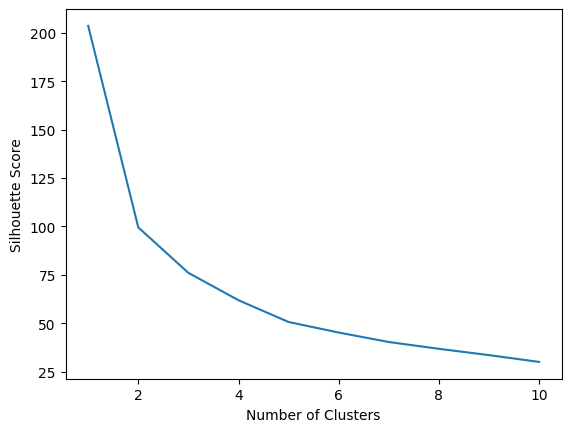

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sc = []

for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++',random_state=42)
    km.fit(x)
    sc.append(km.inertia_)


plt.plot(range(1,11),sc)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [26]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_clusters':[2,3,5],
    'init':['k-means++','random'],
    'n_init':[10,20,30],
}

grid = GridSearchCV(KMeans(),params,cv=5)
grid.fit(x)

GridSearchCV(cv=5, estimator=KMeans(),
             param_grid={'init': ['k-means++', 'random'],
                         'n_clusters': [2, 3, 5], 'n_init': [10, 20, 30]})

In [27]:
print(grid.best_params_)
print(grid.best_estimator_)

{'init': 'k-means++', 'n_clusters': 5, 'n_init': 10}
KMeans(n_clusters=5, n_init=10)


In [28]:
model = grid.best_estimator_
model.fit(x)

KMeans(n_clusters=5, n_init=10)

In [29]:
print(silhouette_score(x,model.labels_))

0.6960309019526671


In [20]:
model2 = KMeans(n_clusters=3,init='k-means++',n_init=10)
model2.fit(x)
print(silhouette_score(x,model2.labels_))

0.8170197330895552
